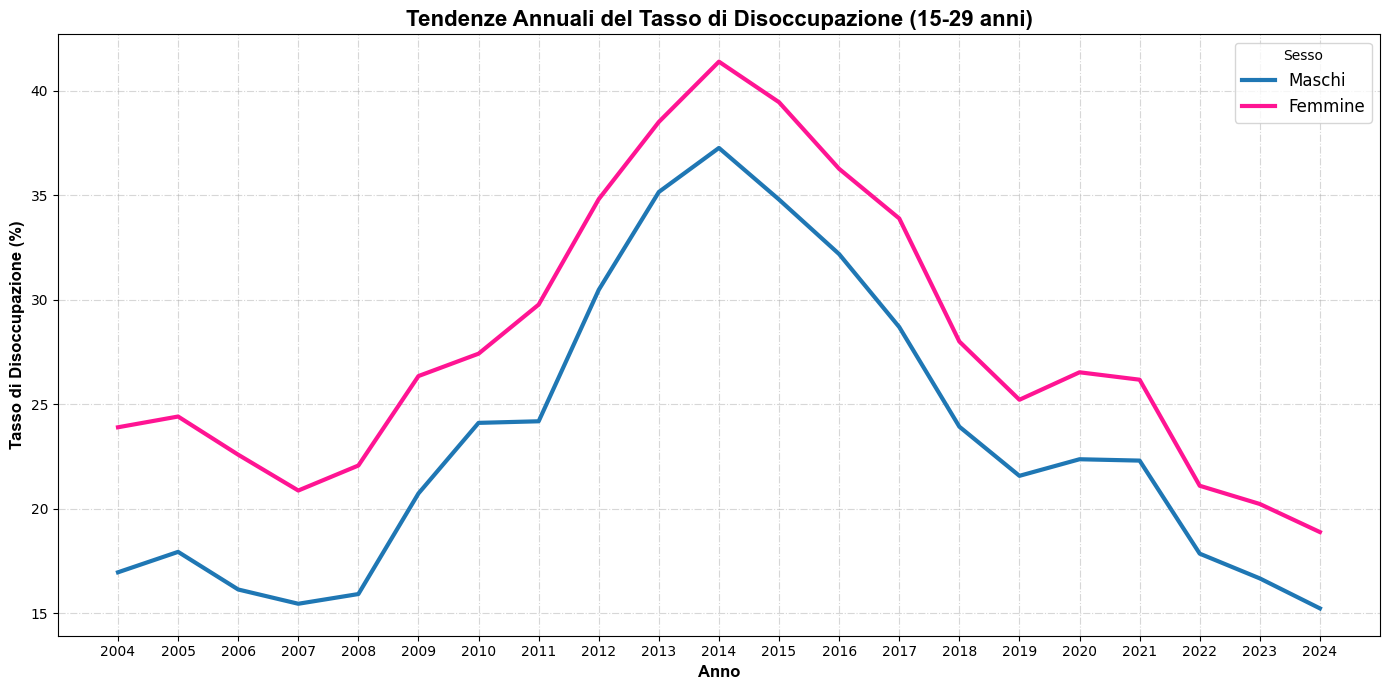

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)
baseD = 'C:/Users/bregu/Desktop/UNIMI/VISUALIZZAZIONE SCIENTIFICA/progetto/'
file_path_15_24 = 'disoccupazione giovanile 15-24.csv' # Sostituisci con il percorso del primo file
file_path_18_29 = 'disoccupazione giovanile 18-29.csv'  # Sostituisci con il percorso del secondo file


# Caricare i dati
data_15_24 = pd.read_csv(file_path_15_24)
data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4]
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4]

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
# Per il dataset 15-24 anni, possiamo usare i dati così come sono
# Per il dataset 18-29 anni, calcoliamo la media tra i 18-24 anni (inclusi)

# Gruppo 18-24 anni per dataset 18-29 (media dei dati)
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between('2018', '2024')]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Creare il grafico con miglioramenti estetici
plt.figure(figsize=(14, 7))

# Linee personalizzate per maschi e femmine (15-29 anni)
sns.lineplot(data=pivot_combined_data['maschi'], label='Maschi', color='#1f77b4', linewidth=3)
sns.lineplot(data=pivot_combined_data['femmine'], label='Femmine', color='#ff1493', linewidth=3)

# Aggiungi titolo e etichette
plt.title('Tendenze Annuali del Tasso di Disoccupazione (15-29 anni)', fontsize=16, fontweight='bold', family='Arial')
plt.xlabel('Anno', fontsize=12, fontweight='bold', family='Arial')
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')

# Miglioramento della leggibilità con griglie
plt.grid(True, linestyle='dashdot', alpha=0.5)

# Legenda
plt.legend(title='Sesso', loc='upper right', fontsize=12)

# Aggiustamenti per una visualizzazione migliore
plt.tight_layout()

# Mostrare il grafico
plt.show()

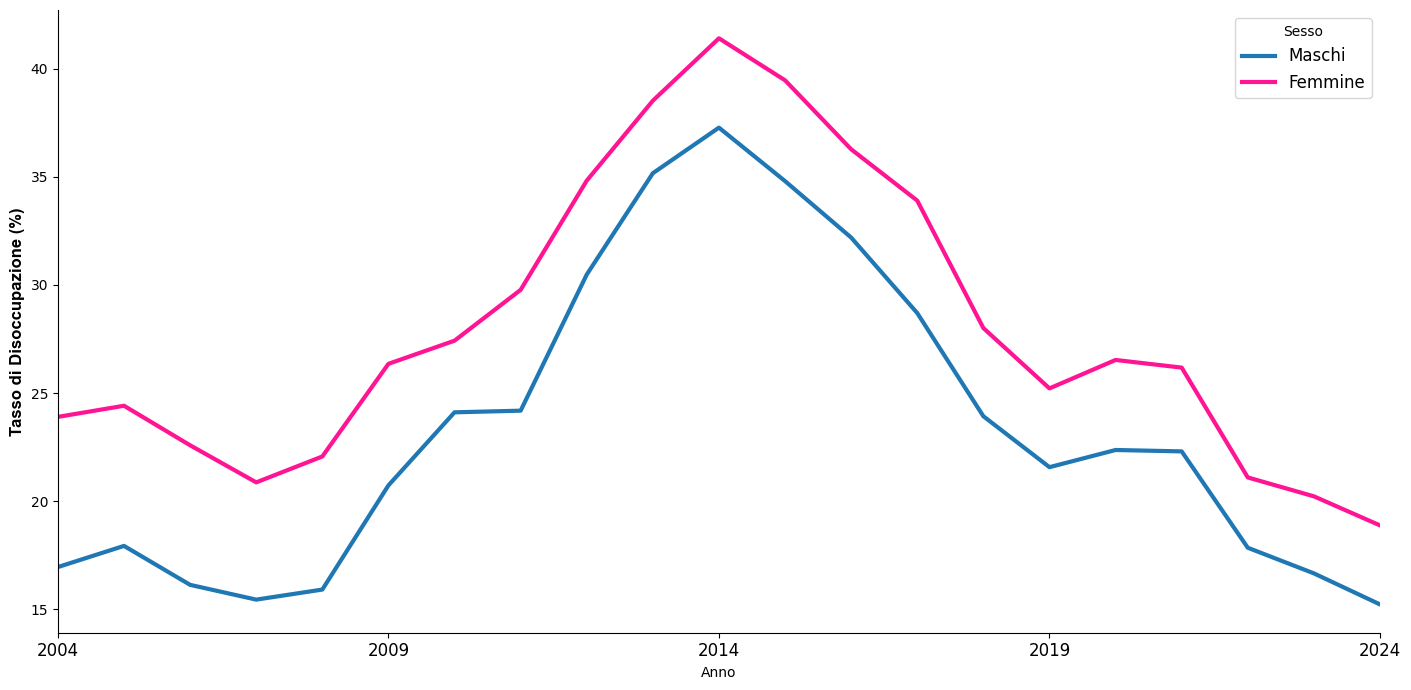

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricare i due dataset (uno per 15-24 anni e l'altro per 18-29 anni)

# Caricare i dati
# data_15_24 = pd.read_csv(file_path_15_24)
# data_18_29 = pd.read_csv(file_path_18_29)

# Filtrare le colonne rilevanti
data_15_24_filtered = data_15_24[['TIME', 'Sesso', 'Value']].dropna()
data_18_29_filtered = data_18_29[['TIME', 'Sesso', 'Value']].dropna()

# Estrarre l'anno da TIME e convertirlo in formato numerico
data_15_24_filtered['Anno'] = data_15_24_filtered['TIME'].str[:4].astype(int)
data_18_29_filtered['Anno'] = data_18_29_filtered['TIME'].str[:4].astype(int)

# Calcolare la media per il gruppo di età 18-24 e per il gruppo 15-29 separatamente
data_18_29_filtered_18_24 = data_18_29_filtered[data_18_29_filtered['Anno'].between(2018, 2024)]

# Unire i dati dei gruppi 15-24 e 18-29
combined_data = pd.concat([data_15_24_filtered, data_18_29_filtered_18_24])

# Calcolare la media per ogni anno, sesso
aggregated_combined_data = combined_data.groupby(['Anno', 'Sesso'], as_index=False)['Value'].mean()

# Pivot per organizzare i dati
pivot_combined_data = aggregated_combined_data.pivot(index='Anno', columns='Sesso', values='Value')

# Creare il grafico con miglioramenti estetici
plt.figure(figsize=(14, 7))

# Linee personalizzate per maschi e femmine (15-29 anni)
sns.lineplot(data=pivot_combined_data['maschi'], label='Maschi', color='#1f77b4', linewidth=3)
sns.lineplot(data=pivot_combined_data['femmine'], label='Femmine', color='#ff1493', linewidth=3)

# Aggiungi titolo e etichette
plt.ylabel('Tasso di Disoccupazione (%)', fontsize=12, fontweight='bold', family='Arial')

# Impostare le etichette dell'asse x ogni 5 anni, dal 2004 al 2024
xticks = [year for year in range(2004, 2025, 5)]
plt.xticks(ticks=xticks, labels=xticks, fontsize=12)

# Legenda
plt.legend(title='Sesso', loc='upper right', fontsize=12)

# Aggiustamenti per una visualizzazione migliore
plt.tight_layout()

# Impostare i limiti dell'asse X in modo che non ci sia spazio vuoto
# plt.xlim([2004, None]) 
plt.xlim([2004, combined_data['Anno'].max()])


# Rimuovere gli assi superiore e destro
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrare il grafico
plt.show()